In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
from sklearn import model_selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import cross_val_score

In [2]:
# Load the dataset from the specified URL and assign column names to the DataFrame
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']

In [3]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)
# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)


In [4]:
# Convert the 'Bare Nuclei' column to an integer type to ensure a uniform data type across the column,
# which is essential for consistent data manipulation and analysis.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [5]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


In [6]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [7]:
data.head()

,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0


In [8]:
# Extract features (X) and target variable (y)
X = data.iloc[:, :-1]  # All columns except the last one
y = data.iloc[:, -1]   # Last column as the target variable

In [9]:
# Perform a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [10]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [11]:
# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)
# Initialize list for base models
estimators = [
    ('logistic', LogisticRegression()),
    ('cart', DecisionTreeClassifier()),
    ('svm', SVC())
]

In [12]:
# Create Voting Classifier ensemble with estimators
ensemble = VotingClassifier(estimators, voting="hard")
# Set up KFold cross-validation
kfold = KFold(n_splits=10, shuffle=True, random_state=7)
# Evaluate ensemble model using cross-validation
results = cross_val_score(ensemble, X_train_scaled, y_train, cv=kfold)

In [13]:
results

array([0.96428571, 0.98214286, 0.91071429, 1.        , 0.96428571,
       0.98214286, 1.        , 0.91071429, 0.94642857, 0.98181818])

In [14]:
# Print mean accuracy score of the ensemble model
print(f"Mean cross-validation accuracy of the ensemble model: {results.mean():.2f}")
# Fit the ensemble on the scaled training set and evaluate on the scaled test set
ensemble.fit(X_train_scaled, y_train)

Mean cross-validation accuracy of the ensemble model: 0.96


VotingClassifier(estimators=[('logistic', LogisticRegression()),
                             ('cart', DecisionTreeClassifier()),
                             ('svm', SVC())])

In [15]:
test_accuracy = ensemble.score(X_test_scaled, y_test)
# Print test accuracy
print(f"Test accuracy of the ensemble model: {test_accuracy:.2f}")

Test accuracy of the ensemble model: 0.96


-------Classification report--------
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

-------Confusion matrix-------------


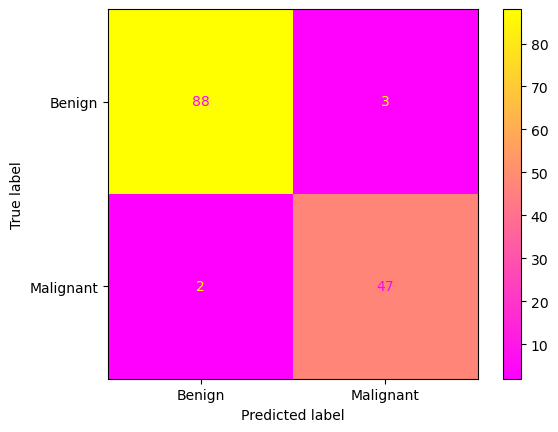

In [19]:
## evaluating model on test dataset
y_pred = ensemble.predict(X_test_scaled)
print('-------Classification report--------')
print(classification_report(y_test,y_pred))
print('-------Confusion matrix-------------')
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Benign','Malignant'])
disp.plot(cmap="spring")
plt.show()

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [21]:
# Load the Wisconsin Breast Cancer dataset
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data'
data = pd.read_csv(url, header=None, na_values='?')
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses', 'Class']

In [22]:
# Replace class values to be binary (2 for benign, 4 for malignant)
data['Class'] = data['Class'].replace({2: 0, 4: 1})

In [23]:
# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)
# Convert object type column to numeric
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [24]:
# Features and target
# `Sample code`(0th column) is exempted when creating X
X = data.iloc[:, 1:-1]
y = data['Class']

In [25]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [26]:
# Imputation to handle missing values
imputer = SimpleImputer(strategy='median')
# Define the base models with standard scaling and imputation
model1 = make_pipeline(imputer, StandardScaler(), LogisticRegression(random_state=1, max_iter=10000))
model2 = make_pipeline(imputer, StandardScaler(), DecisionTreeClassifier(random_state=1))
model3 = make_pipeline(imputer, StandardScaler(), SVC(probability=True, random_state=1))
# Define k-fold cross-validation procedure
kf = KFold(n_splits=10, shuffle=True, random_state=1)
# Create an ensemble of models for hard voting
hard_voting_classifier = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('svc', model3)],
    voting='hard'
)

In [27]:
# Cross-validation on the training data
hard_cv_scores = cross_val_score(hard_voting_classifier, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Hard Voting - Mean CV Accuracy: {hard_cv_scores.mean():.4f}")
# Fit and evaluate on the test data
hard_voting_classifier.fit(X_train, y_train)
y_pred_hard = hard_voting_classifier.predict(X_test)
hard_test_accuracy = hard_voting_classifier.score(X_test, y_test)

Hard Voting - Mean CV Accuracy: 0.9659


In [28]:
print(f"Hard Voting - Test Accuracy: {hard_test_accuracy:.4f}")
# Additional evaluation metrics for hard voting classifier
print("Hard Voting - Classification Report")
print(classification_report(y_test, y_pred_hard))
print("Hard Voting - Confusion Matrix:-")
print(confusion_matrix(y_test, y_pred_hard))
print("----------------------------------------------")
# Create and evaluate a soft voting classifier
soft_voting_classifier = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('svc', model3)],
    voting='soft'
)

Hard Voting - Test Accuracy: 0.9643
Hard Voting - Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Hard Voting - Confusion Matrix:-
[[88  3]
 [ 2 47]]
----------------------------------------------


In [29]:
# Cross-validation on the training data
soft_cv_scores = cross_val_score(soft_voting_classifier, X_train, y_train, cv=kf, scoring='accuracy')
print(f"Soft Voting - Mean CV Accuracy: {soft_cv_scores.mean():.4f}")
# Fit and evaluate on the test data
soft_voting_classifier.fit(X_train, y_train)
y_pred_soft = soft_voting_classifier.predict(X_test)
soft_test_accuracy = soft_voting_classifier.score(X_test, y_test)
print(f"Soft Voting - Test Accuracy: {soft_test_accuracy:.4f}")

Soft Voting - Mean CV Accuracy: 0.9624
Soft Voting - Test Accuracy: 0.9643


In [31]:
# Additional evaluation metrics for soft voting classifier
print("Soft Voting - Classification Report:-")
print(classification_report(y_test, y_pred_soft))
print("Soft Voting - Confusion Matrix")
print(confusion_matrix(y_test, y_pred_soft))

Soft Voting - Classification Report:-
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        91
           1       0.94      0.96      0.95        49

    accuracy                           0.96       140
   macro avg       0.96      0.96      0.96       140
weighted avg       0.96      0.96      0.96       140

Soft Voting - Confusion Matrix
[[88  3]
 [ 2 47]]


In [32]:
# Import required libraries
import pandas as pd
import numpy as np
from sklearn import model_selection
from sklearn.model_selection import KFold
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [33]:
# Load the Pima Indians Diabetes dataset using the given URL and assign the names
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
data = pd.read_csv(url, names=names)
# Check the head of the data using the head() method
data.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [34]:
# Assign all the rows up to the 8th column of the data to X
X = data.iloc[:,0:8].values
# Assign the 9th column of the same data to Y
y = data["class"].values

In [35]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
# Create an instance of SimpleImputer to fill in missing values with the median
imputer = SimpleImputer(strategy='median')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)
# Create an instance of MinMaxScaler to scale features to a range of (0, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [43]:
# Set up the k-fold cross-validation with n_splits to 10
kfold = model_selection.KFold(n_splits=10, shuffle=True, random_state=1)
# Create a decision tree classifier named cart
cart = DecisionTreeClassifier()
# The estimator will be set to 100, which is equal to the number of trees
num_trees = 100

In [44]:
# Create a bagging classifier with the decision tree classifier (cart) as the base estimator
# Ensure oob_score is enabled
bagging_model = BaggingClassifier(estimator=cart, n_estimators=num_trees, random_state=12, oob_score=True)
# Perform cross-validation using the model, feature matrix (X), target vector (y), and specified number of folds (cv)
results = model_selection.cross_val_score(bagging_model, X_train_scaled, y_train, cv=kfold)
# Print the cross-validation results
print(results)

[0.79032258 0.67741935 0.75806452 0.70967742 0.86885246 0.78688525
 0.63934426 0.7704918  0.73770492 0.72131148]


In [45]:
# Calculate the Mean Cross-Validation Score using .mean() function
mean_score = np.mean(results)
print("Mean Cross-Validation Score:", mean_score)

Mean Cross-Validation Score: 0.7460074034902168


___________________________Bagging Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           0       0.80      0.79      0.79        99
           1       0.62      0.64      0.63        55

    accuracy                           0.73       154
   macro avg       0.71      0.71      0.71       154
weighted avg       0.73      0.73      0.73       154

# Confusion matrix


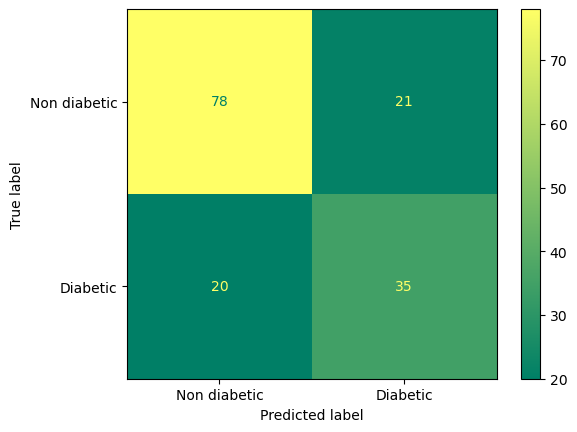

In [46]:
# fitting  and evaluating Bagging classifier model in training and test dataset
bagging_model.fit(X_train_scaled,y_train)
print('___________________________Bagging Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = bagging_model.predict(X_test_scaled)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Non diabetic','Diabetic']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()

In [49]:
# Perform cross-validation and compute OOB error
oob_error = 1 - bagging_model.fit(X_train_scaled, y_train).oob_score_
print("Out-of-Bag Error:", oob_error)

Out-of-Bag Error: 0.23615635179153094


#Adaboost

In [50]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import KFold, cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

In [51]:
# Load the dataset from the given URL and assign column names
data = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data', header=None)
data.columns = ['Sample code', 'Clump Thickness', 'Uniformity of Cell Size', 'Uniformity of Cell Shape',
                'Marginal Adhesion', 'Single Epithelial Cell Size', 'Bare Nuclei', 'Bland Chromatin',
                'Normal Nucleoli', 'Mitoses','Class']

In [52]:
# Drop the 'Sample code' column as it's not required for prediction
data.drop(['Sample code'], axis=1, inplace=True)
# Replace '?' with nan to handle missing data, ensuring numerical analysis accuracy and preventing calculation errors.
data = data.replace('?', np.nan)

In [53]:
# Convert the 'Bare Nuclei' column to an integer type to ensure a uniform data type across the column,
# which is essential for consistent data manipulation and analysis.
data['Bare Nuclei'] = pd.to_numeric(data['Bare Nuclei']).fillna(0).astype('int64')

In [54]:
# Split data into features (X) and target variable (y)
X = data.drop('Class', axis=1)
y = data['Class']

In [55]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [56]:
# Define K-fold cross-validation
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
# Create a pipeline for AdaBoost classifier with Decision Tree base estimator
adaboost_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler(feature_range=(0, 1))),
    ('classifier', AdaBoostClassifier(n_estimators=70, random_state=7))
])
# Evaluate the Adaboost Classifier pipeline using cross-validation on the training set
adaboost_results = cross_val_score(adaboost_pipeline, X_train, y_train, cv=kfold)
print("AdaBoost Classifier mean accuracy: ", adaboost_results.mean())
# Fit the Adaboost Classifier pipeline on the training set and evaluate on the test set
adaboost_pipeline.fit(X_train, y_train)
adaboost_test_score = adaboost_pipeline.score(X_test, y_test)
print("Adaboost Classifier test accuracy: ", adaboost_test_score)

C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\arsha\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\ars

AdaBoost Classifier mean accuracy:  0.9642207792207792
Adaboost Classifier test accuracy:  0.9714285714285714


___________________________Adaboost Classifier_______________________

# Classification report
              precision    recall  f1-score   support

           2       0.98      0.98      0.98        91
           4       0.96      0.96      0.96        49

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140

# Confusion matrix


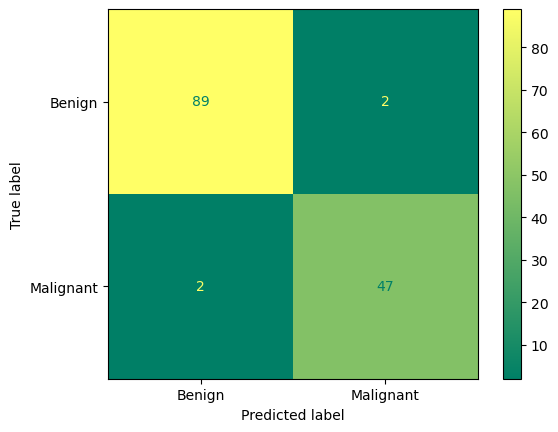

In [57]:
# fitting  and evaluating Boosting classifier model in training and test dataset
print('___________________________Adaboost Classifier_______________________')
print()
# evaluating model on test dataset
y_pred = adaboost_pipeline.predict(X_test)
print('# Classification report')
print(classification_report(y_test,y_pred))
print('# Confusion matrix')
cmap = 'summer'
display_labels=['Benign','Malignant']
cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_labels)
disp.plot(cmap=cmap)
plt.show()